# Módulo 10 tarefa 03
Considere a mesma base de dados utilizada na tarefa 1 ```previsao_de_renda.csv```.

In [2]:
# Carregando as bibliotecas relevantes
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Carregando e lendo o arquivo
filepath = 'https://raw.githubusercontent.com/dsvitorchaves/EBAC/refs/heads/main/previsao_de_renda.csv'
df_original = pd.read_csv(filepath)

df_novo = df_original.drop(columns='Unnamed: 0').set_index(keys='index', drop=True)

df_novo.head()

,data_ref,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
index,,,,,,,,,,,,,,
8682,2015-01-01,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
12830,2015-01-01,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2885,2015-01-01,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
16168,2015-01-01,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
12438,2015-01-01,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37


In [4]:
df_novo.dtypes

data_ref                  object
sexo                      object
posse_de_veiculo            bool
posse_de_imovel             bool
qtd_filhos                 int64
tipo_renda                object
educacao                  object
estado_civil              object
tipo_residencia           object
idade                      int64
tempo_emprego            float64
qt_pessoas_residencia    float64
mau                         bool
renda                    float64
dtype: object

###  <span style="color:blue"> 1) Construa um gráfico de barras para avaliar a distribuição das variáveis qualitativas no tempo. Você acha que houve alguma alteração importante a ser investigada?

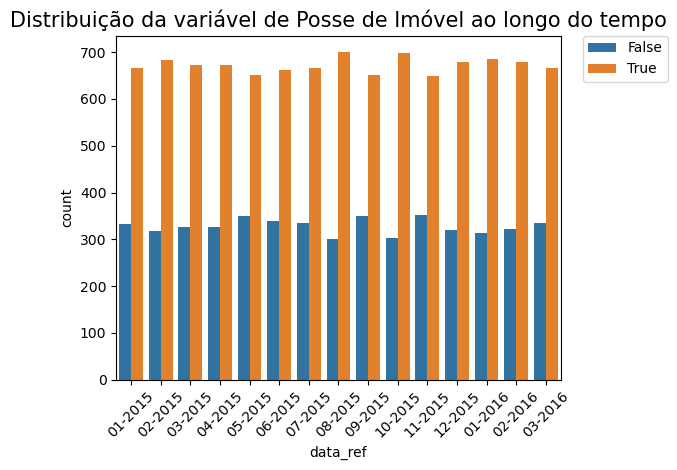

In [6]:
# Converter a coluna 'data_ref'  -> formato datetime 
#mudando as datas inválidas em NaT 
df_novo['data_ref'] = pd.to_datetime(df_novo['data_ref'], errors='coerce') 


ax = sns.countplot(x='data_ref', hue='posse_de_imovel', data=df_novo)
tick_labs = df_novo['data_ref'].map(lambda ts: ts.strftime("%m-%Y")).unique()
plt.title('Distribuição da variável de Posse de Imóvel ao longo do tempo', size=15)

ticks = ax.set_xticks(list(range(df_novo['data_ref'].nunique())))
labels = ax.set_xticklabels(tick_labs, rotation=45)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.tight_layout()
plt.show()


In [7]:
tab = pd.crosstab(df_novo['data_ref'],df_novo['posse_de_imovel'])
tab.div(tab.sum(axis = 1), axis = 0)

posse_de_imovel,False,True
data_ref,,
2015-01-01,0.333,0.667
2015-02-01,0.317,0.683
2015-03-01,0.327,0.673
2015-04-01,0.327,0.673
2015-05-01,0.349,0.651
2015-06-01,0.339,0.661
2015-07-01,0.334,0.666
2015-08-01,0.300,0.700
2015-09-01,0.349,0.651


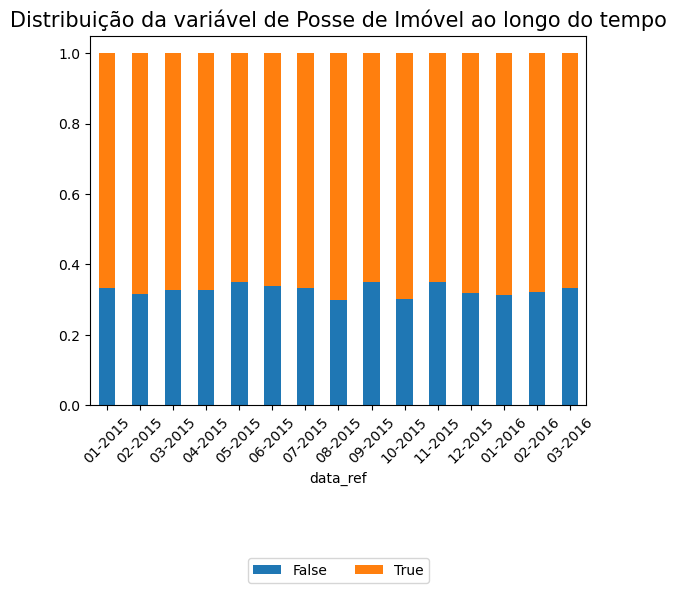

In [8]:
tab_freq = pd.crosstab(df_novo['data_ref'],df_novo['posse_de_imovel'])
tab = tab_freq.div(tab.sum(axis = 1), axis = 0)

ax = tab.plot.bar(stacked = True)

tick_labs = df_novo['data_ref'].map(lambda ts: ts.strftime("%m-%Y")).unique()
plt.title('Distribuição da variável de Posse de Imóvel ao longo do tempo', size=15)

ticks = ax.set_xticks(list(range(df_novo['data_ref'].nunique())))
labels = ax.set_xticklabels(tick_labs, rotation=45)

plt.legend(loc = 'lower center', bbox_to_anchor=(0.5, -.50),ncol = 3)

In [9]:
tab2 = pd.crosstab(df_novo['data_ref'],df_novo['posse_de_veiculo'])
tab2.div(tab.sum(axis = 1), axis = 0)

posse_de_veiculo,False,True
data_ref,,
2015-01-01,611.0,389.0
2015-02-01,600.0,400.0
2015-03-01,601.0,399.0
2015-04-01,652.0,348.0
2015-05-01,617.0,383.0
2015-06-01,602.0,398.0
2015-07-01,619.0,381.0
2015-08-01,604.0,396.0
2015-09-01,601.0,399.0


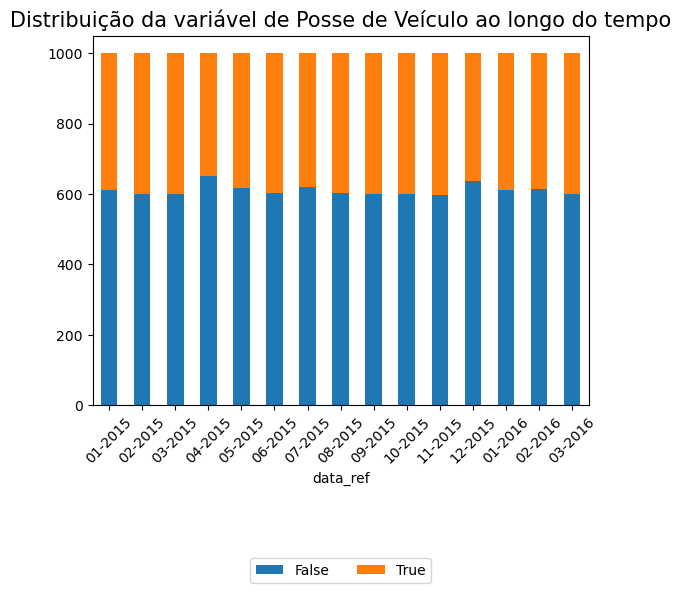

In [10]:
tab_freq2 = pd.crosstab(df_novo['data_ref'],df_novo['posse_de_veiculo'])
tab2 = tab_freq2.div(tab.sum(axis = 1), axis = 0)

ax = tab2.plot.bar(stacked = True)

tick_labs = df_novo['data_ref'].map(lambda ts: ts.strftime("%m-%Y")).unique()
plt.title('Distribuição da variável de Posse de Veículo ao longo do tempo', size=15)

ticks = ax.set_xticks(list(range(df_novo['data_ref'].nunique())))
labels = ax.set_xticklabels(tick_labs, rotation=45)

plt.legend(loc = 'lower center', bbox_to_anchor=(0.5, -.50),ncol = 3)

### <span style="color:blue"> Insight: 
##### <span style="color:green"> Analisando os gráficos acima, não podemos notar nenhuma mudança significativa ao longo do tempo. Embora os dados pareçam confiáveis, uma investigação mais aprofundada é necessária antes da criação do modelo.

###  <span style="color:blue"> 2) Para cada variável qualitativa, construa um gráfico mostrando as médias de cada nível da variável no tempo e avalie a estabilidade. Houve alguma alteração importante? Você acha que se pode utilizar essas variáveis em uma modelagem?

In [12]:
#Serarando as variáveis qualitativas
qualitativas = df_novo.select_dtypes(include=['object', 'boolean']).columns

C:\Users\mtidi\AppData\Local\Temp\ipykernel_796\3294600771.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(labels=tick_labels, rotation=45)
C:\Users\mtidi\AppData\Local\Temp\ipykernel_796\3294600771.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(labels=tick_labels, rotation=45)
C:\Users\mtidi\AppData\Local\Temp\ipykernel_796\3294600771.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(labels=tick_labels, rotation=45)
C:\Users\mtidi\AppData\Local\Temp\ipykernel_796\3294600771.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(labels=tick_labels, rotation=45)
C:\U

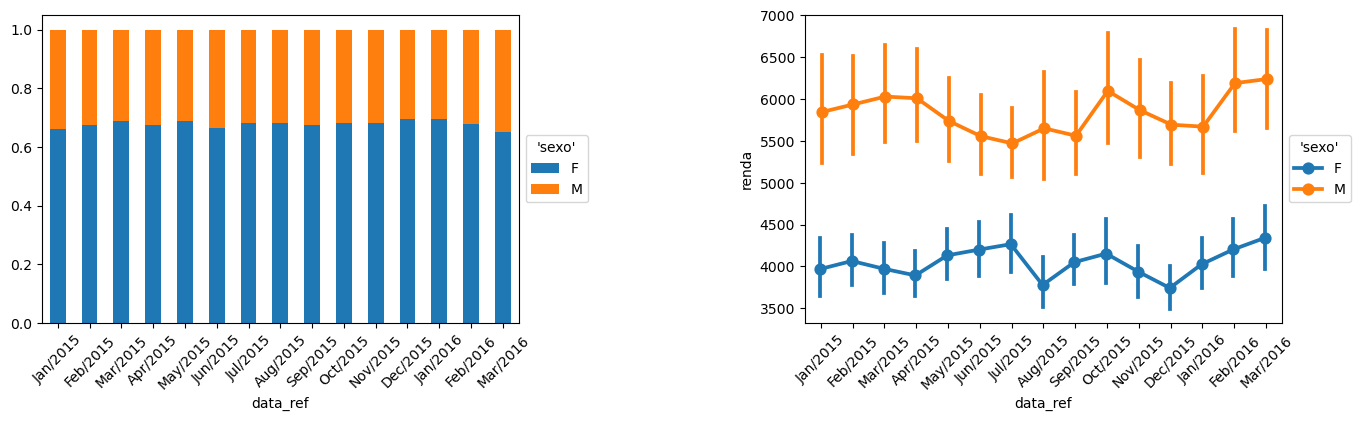

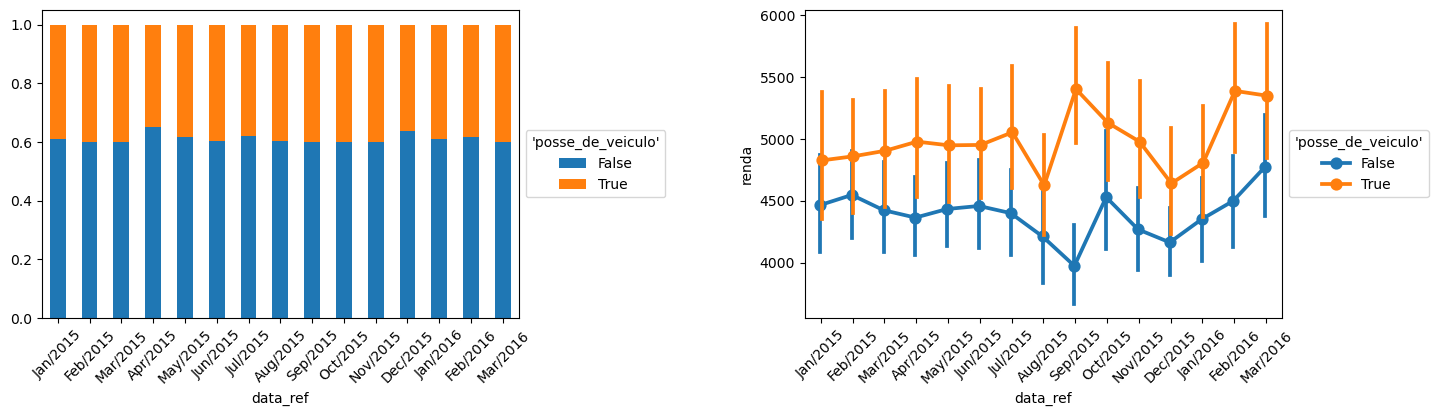

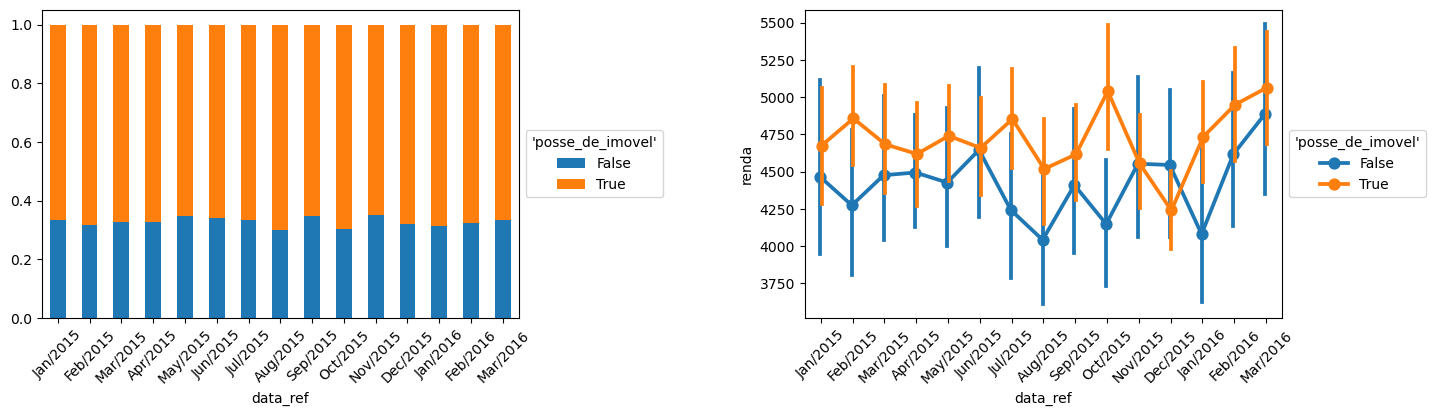

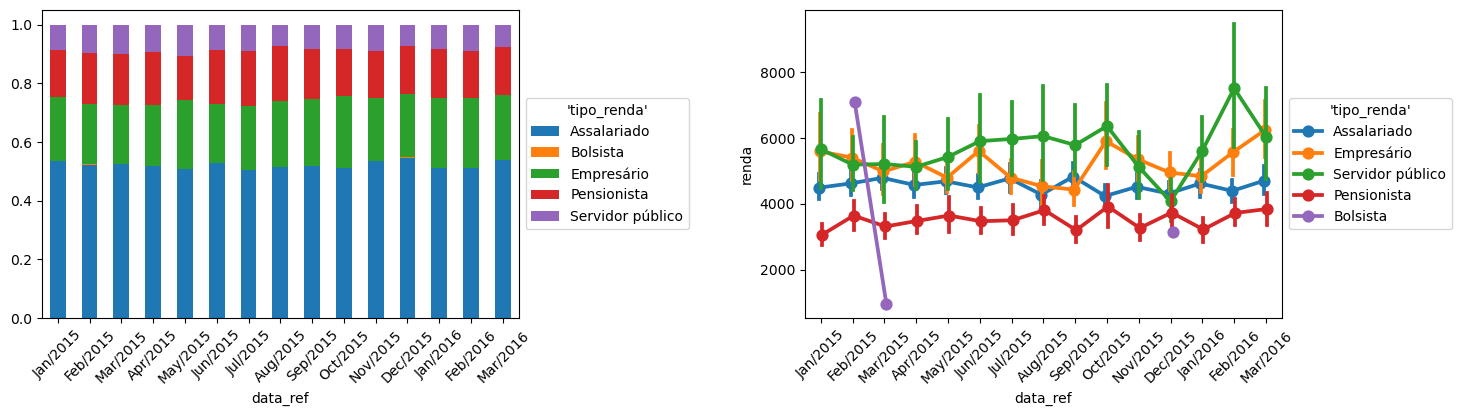

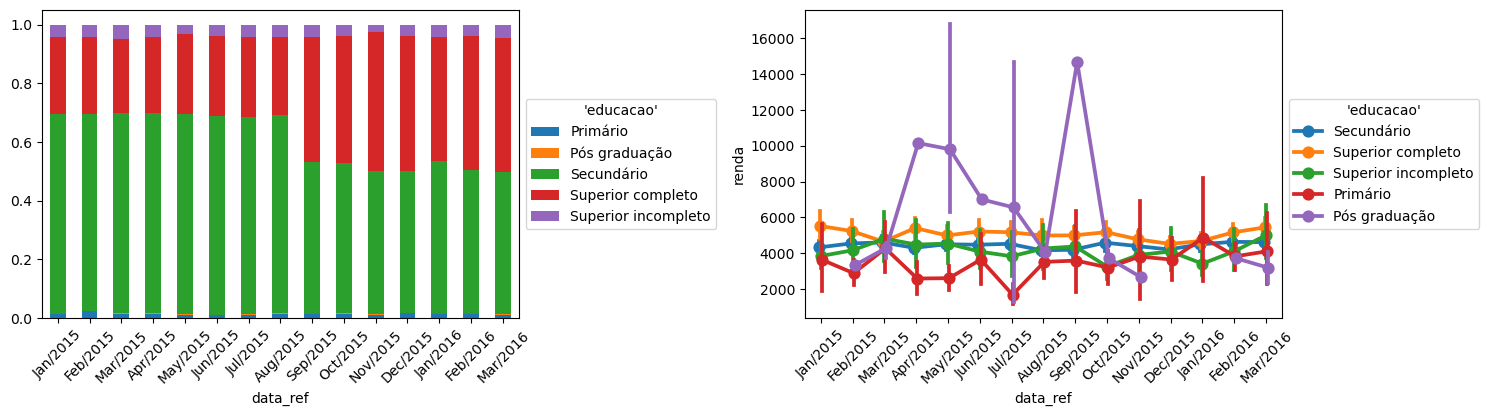

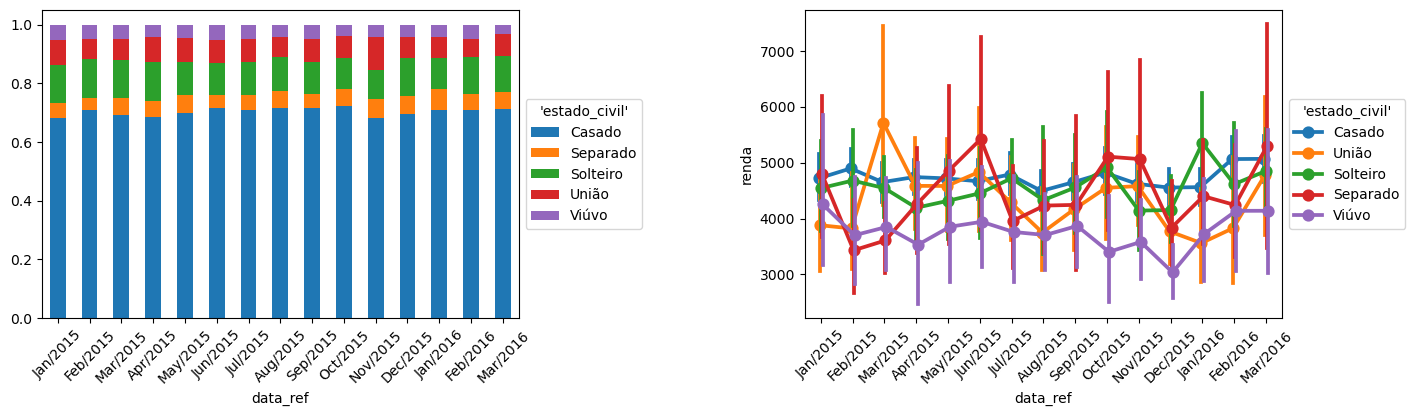

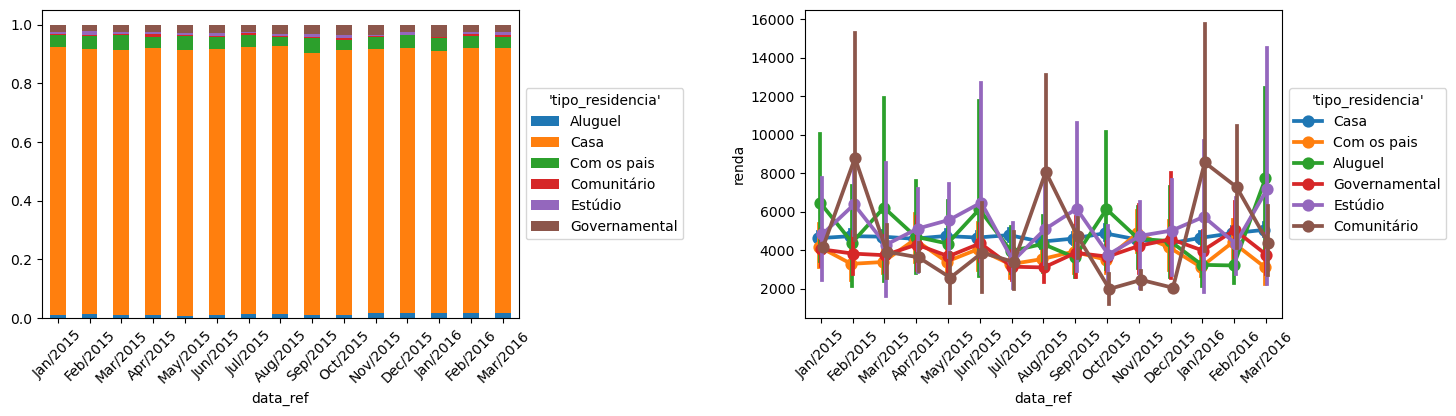

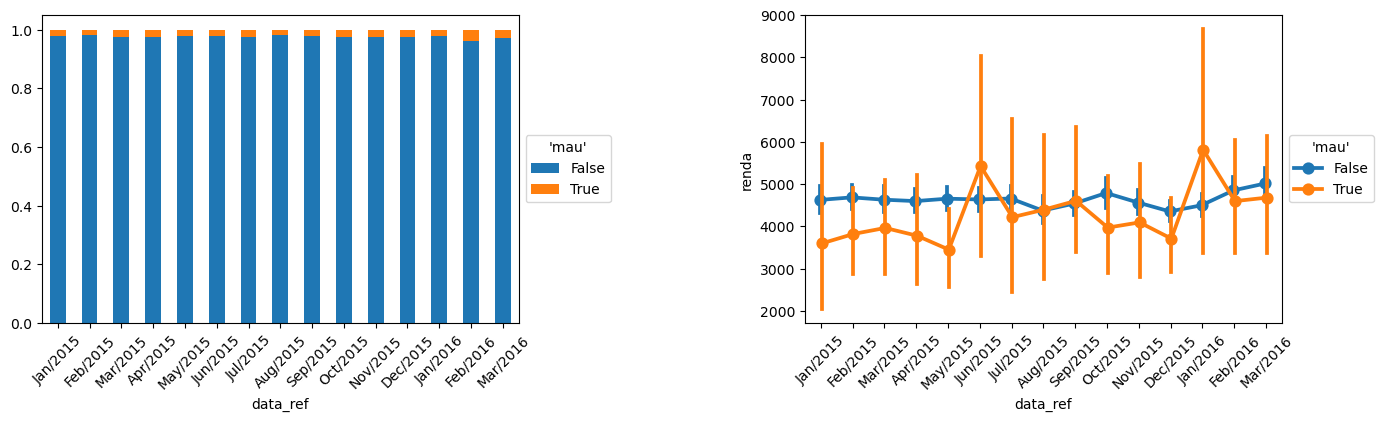

In [28]:
plt.rc('figure', figsize=(16,4))

for col in qualitativas:
    fig, axes = plt.subplots(1,2)
    fig.subplots_adjust(wspace=.6)
    
    tick_labels = df_novo['data_ref'].map(lambda x: x.strftime('%b/%Y')).unique()
    
    # barras empilhadas:
    df_crosstab = pd.crosstab(index=df_novo['data_ref'], 
                              columns=df_novo[col], 
                              normalize='index')
    ax0 = df_crosstab.plot.bar(stacked=True, ax=axes[0])
    ax0.set_xticklabels(labels=tick_labels, rotation=45)
    axes[0].legend(bbox_to_anchor=(1,.5), loc=6, title=f"'{col}'")

    # perfis médios no tempo:
    ax1 = sns.pointplot(x='data_ref', y='renda', hue=col, data=df_novo, dodge=True, errorbar=('ci', 95), ax=axes[1])
    ax1.set_xticklabels(labels=tick_labels, rotation=45)
    axes[1].legend(bbox_to_anchor=(1,.5), loc=6, title=f"'{col}'")



#### <span style="color:red"> Insights: 
##### <span style="color:green"> Podemos notar alteraçao notável apenas na variável ```educacao```. Acredito então que todas as outras variáveis qualitativas possam ser utilizadas em um modelo devido à estabilidade de distribuição ao longo do tempo.